**INTRODUCTION**

ZFS being a local loan landing company providing small buisness loans. Data provided by company with the notice of loan application has been increased to 200%. Which is a huge incriment in the application. 

In the company the applications are still managed manually. And, increment in the number of application, puts more burden at the employees of company. Also it affects the quality of service of the company. 

A solution suggested regarding the problem of lack of resources and robust growth of the company is :

>
Try to find the information of applicants which makes major impact on applicant's loan getting accepted or rejected. And apply it to the model which can forecast the chances of loan application which are safe.





In [1]:
!pip install tabula-py

     |████████████████████████████████| 12.0 MB 2.9 MB/s 


In [2]:
!pip install --upgrade pandas

## Import Libraries

In [3]:
import tabula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [4]:
# #test deta
# table = tabula.read_pdf("PDA - Loans_Database_Table.pdf",pages='all')

In [5]:
# print(table)

In [6]:
# df = table[0]

In [7]:
# df.head()

In [8]:
# print('Rows: {0} \nColumns: {1}'.format(df.shape[0],df.shape[1]))

In [9]:
df_train = pd.read_excel(r"PDA - Loans_Database_Table.xlsx")

In [10]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [11]:
print('Rows: {0} \nColumns: {1}'.format(df_train.shape[0],df_train.shape[1]))

Rows: 398 
Columns: 13


In [12]:
df_test = pd.read_excel(r"PDA - Zappy Loan Data.xlsx")

In [13]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [14]:
print('Rows: {0} \nColumns: {1}'.format(df_test.shape[0],df_test.shape[1]))

Rows: 247 
Columns: 13


## Data Analysis

In [15]:
df_train.describe()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1657.125628,1.178392,0.650754,0.721106,0.809045,0.123116,5341.944724,1504.077387,145.371859,344.020101,0.791457,1.894472
std,371.764584,0.383324,0.477332,1.011325,0.393548,0.328983,5723.445768,1850.253352,83.941460,63.458665,0.406778,0.786485
min,1002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,36.000000,0.000000,1.000000
25%,1343.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2940.500000,0.000000,102.500000,360.000000,1.000000,1.000000
50%,1672.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3861.500000,1221.000000,128.000000,360.000000,1.000000,2.000000
75%,1954.750000,1.000000,1.000000,1.000000,1.000000,0.000000,5688.000000,2332.250000,163.000000,360.000000,1.000000,3.000000
max,2281.000000,2.000000,1.000000,3.000000,1.000000,1.000000,63337.000000,11300.000000,700.000000,480.000000,1.000000,3.000000


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            398 non-null    int64  
 1   Gender             398 non-null    int64  
 2   Married            398 non-null    int64  
 3   Dependents         398 non-null    int64  
 4   Graduate           398 non-null    int64  
 5   Self_Employed      398 non-null    int64  
 6   ApplicantIncome    398 non-null    int64  
 7   CoapplicantIncome  398 non-null    float64
 8   LoanAmount         398 non-null    int64  
 9   Loan_Amount_Term   398 non-null    int64  
 10  Credit_History     398 non-null    int64  
 11  Property_Area      398 non-null    int64  
 12  Loan_Status        398 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 40.5+ KB


There are no object type functionalities in dataset. Hence, conversion to int or float data type is not needed.

But if there is one it is important to do the conversion before moving forward.

In [17]:
#Dropping Loan_ID column, as it does not hold any significance
df_train = df_train.drop('Loan_ID', axis = 1)

In [18]:
#Mapping Loan status to 1 and 0 for Yes and No status to use in model
df_train.Loan_Status = df_train.Loan_Status.map({'Y':1, 'N':0})

In [19]:
df_train.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128,360,1,1,1
1,1,1,1,1,0,4583,1508.0,128,360,1,3,0
2,1,1,0,1,1,3000,0.0,66,360,1,1,1
3,1,1,0,0,0,2583,2358.0,120,360,1,1,1
4,1,0,0,1,0,6000,0.0,141,360,1,1,1


In [20]:
#Check for null values in Train dataset
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As there are no null values there is no need for data cleaning, we will move towards data visualization to understand situation better.

If there are any null values we can either remove the records or we can fill that record with option of majority of value in that data column.

## Data Visualization

In [21]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have multiple functionalities available, we will try to find the most relevant or we can say important functionalities and we will try to analyze it.

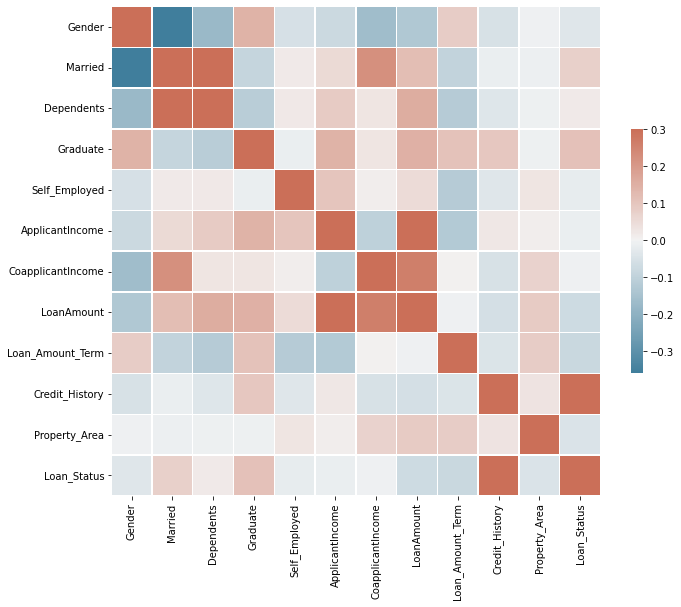

In [22]:
#correlation matrix
corr = df_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

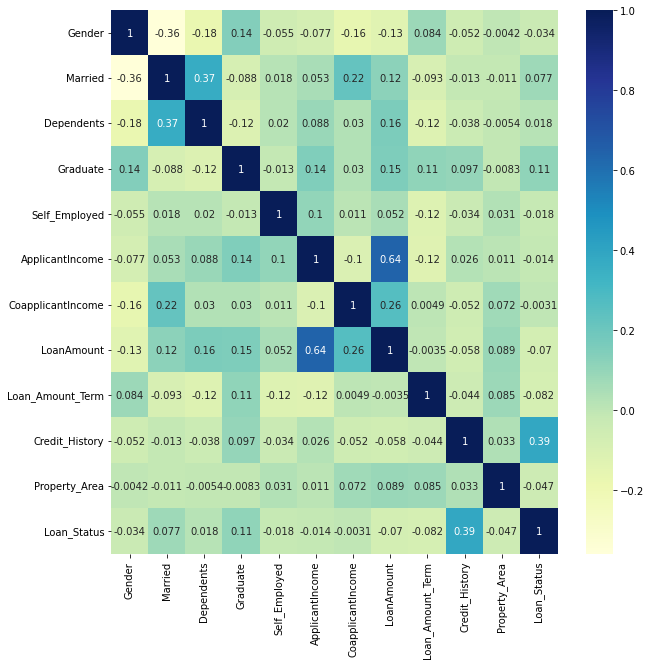

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

From the correlation matrix we can conclude that most important factors in loans getting approved are following:


*   Credit History
*   Education Status
*   Marital Status
*   Number of Dependants
*   Employment Status







In [24]:
col = df_train[["Credit_History","Graduate","Married","Dependents","Self_Employed"]]

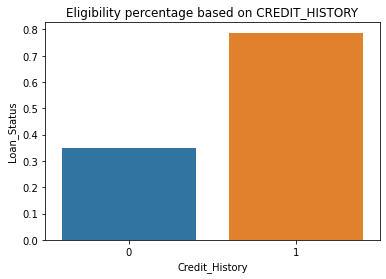

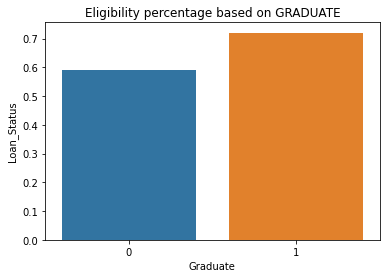

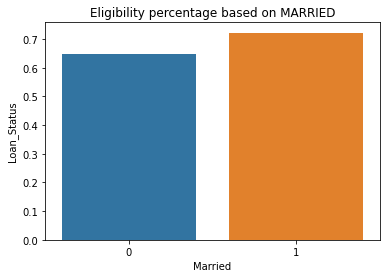

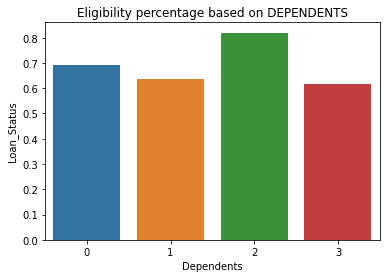

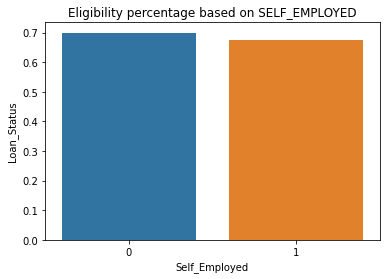

In [25]:
for c in col:
    sns.barplot( data = df_train.groupby(c)['Loan_Status'].mean().reset_index() ,x=c ,y="Loan_Status")
    plt.title('Eligibility percentage based on '+ c.upper())
    plt.show()
    print('\n\n')

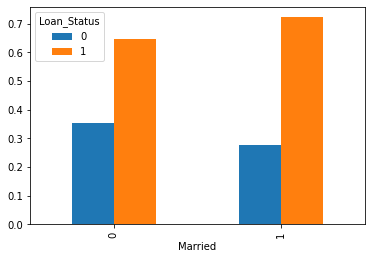

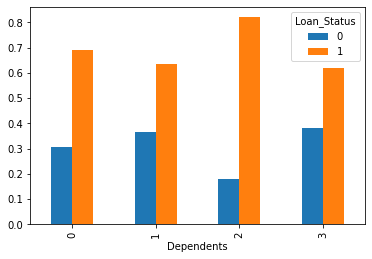

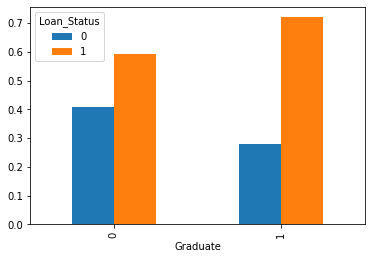

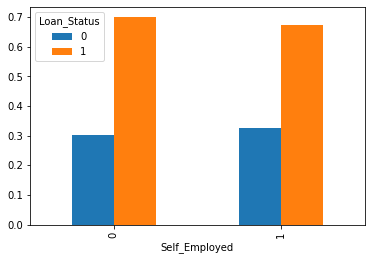

In [26]:
Married=pd.crosstab(df_train['Married'],df_train['Loan_Status'])
Dependents=pd.crosstab(df_train['Dependents'],df_train['Loan_Status'])
Education=pd.crosstab(df_train['Graduate'],df_train['Loan_Status'])
Self_Employed=pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()

## Building Models

In [27]:
X = df_train.drop(columns=['Loan_Status'], axis=1)
y = df_train['Loan_Status']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

In [35]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [36]:
rf_model = RandomForestClassifier().fit(df_train.drop("Loan_Status",axis=1),df_train["Loan_Status"])

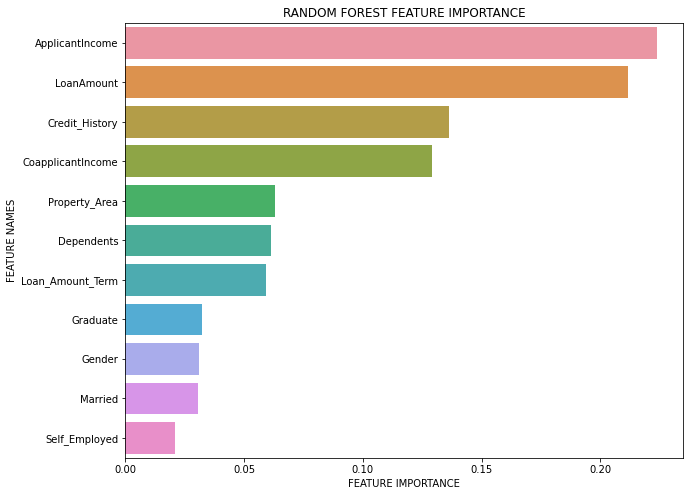

In [37]:
plot_feature_importance(rf_model.feature_importances_,df_train.drop("Loan_Status",axis=1).columns,'RANDOM FOREST')

In [38]:
gbc_model = GradientBoostingClassifier().fit(df_train.drop("Loan_Status",axis=1),df_train["Loan_Status"])

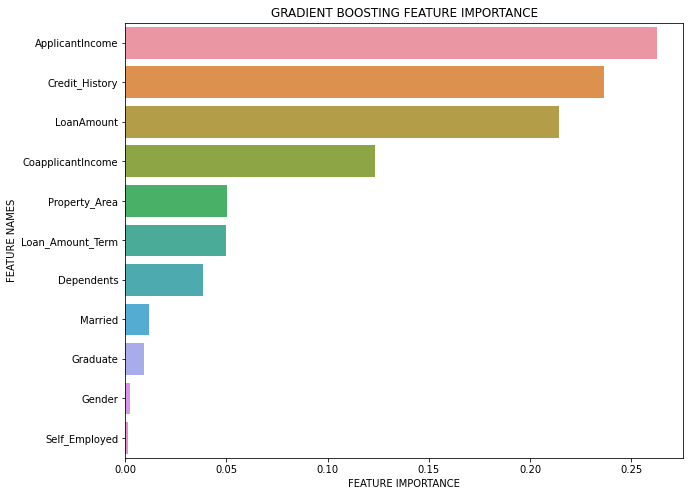

In [39]:
plot_feature_importance(gbc_model.feature_importances_,df_train.drop("Loan_Status",axis=1).columns,'GRADIENT BOOSTING')

In [40]:
abc_model = AdaBoostClassifier().fit(df_train.drop("Loan_Status",axis=1),df_train["Loan_Status"])

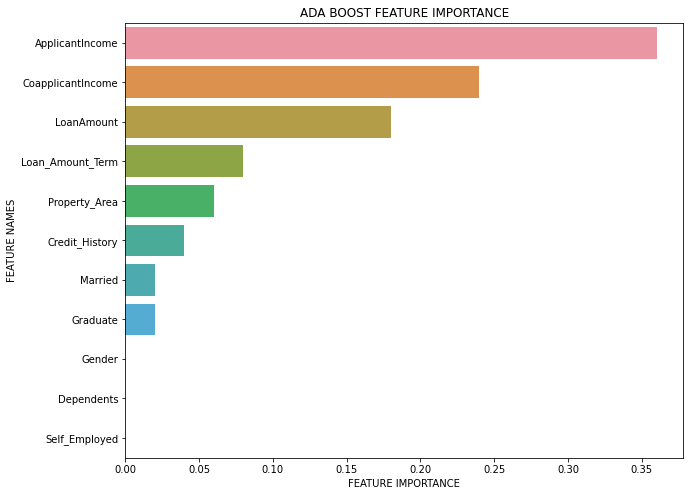

In [41]:
plot_feature_importance(abc_model.feature_importances_,df_train.drop("Loan_Status",axis=1).columns,'ADA BOOST')

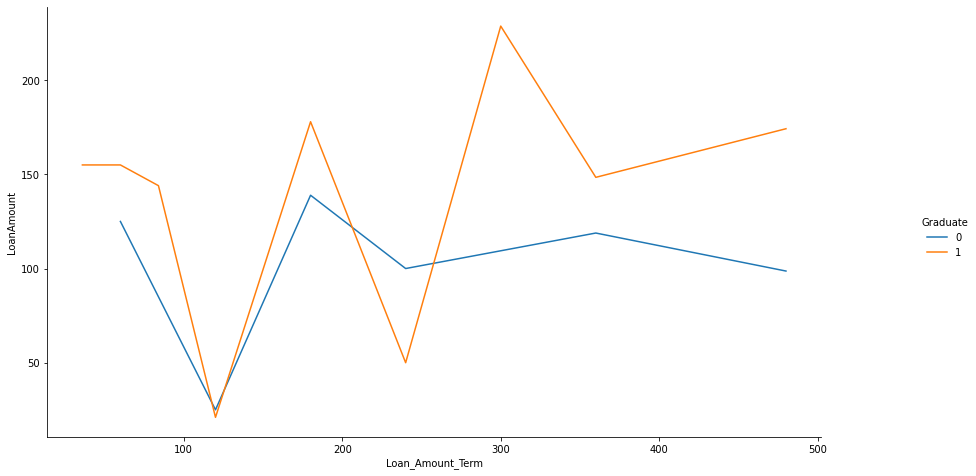

In [42]:
g=sns.relplot(x="Loan_Amount_Term", y="LoanAmount", data=df_train,kind="line",hue="Graduate",ci=None)
g.fig.set_size_inches(15,7)
plt.show()

Top 5 features are,

*   Credit_History
*   ApplicantIncome
*   LoanAmount
*   CoapplicantIncome
*   Loan_Amount_Term

In [45]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

In [46]:
X = df_train.drop('Loan_Status',axis=1)
y = df_train['Loan_Status']

In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=30)

In [48]:
clf.fit(Xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [49]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [50]:
pred = clf.best_estimator_.predict(Xtest)

In [51]:
confusion_matrix(ytest,pred)

array([[ 8, 25],
       [ 9, 78]])

In [52]:
print("Accuracy score: {0}%".format((accuracy_score(ytest,pred)*100).round(2)))

Accuracy score: 71.67%


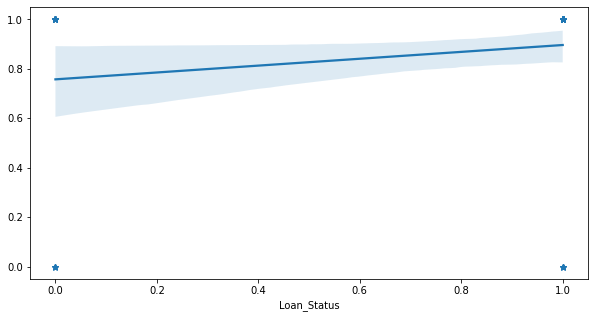

In [53]:
fig,ax=plt.subplots(figsize=(10,5))
sns.regplot(x=ytest,y=pred,marker="*")
plt.show()